# Ex 26.10.23

First recall the Iris data set used to classify Iris flowers.

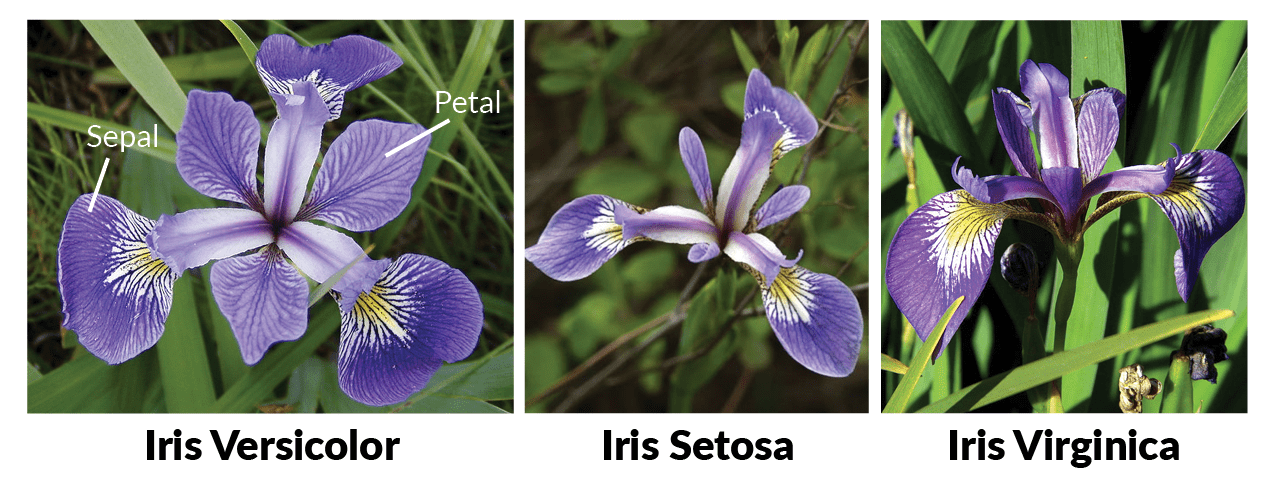

We first load the modules we need.

In [2]:
import numpy as np
import pandas as pd

Now load the Iris data set.

In [3]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

Let's have a quick look at this data set again.

In [5]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The keys of interest to us will be the keys
* `'data'`
* `'target'`
* `'target_names'`
* `'feature_names'`

Remember that `'data'` contains the data associated to our sample set of Iris flowers.
For each Iris flower we have four measurements, these attributes are called the *features*.
This is stored as an array, the rows corresponding to flowers and the columns to their features/measurements.
We can see how many flowers and features we have by checking the shap of the array.

In [6]:
print(iris_dataset.data.shape)

(150, 4)


In [7]:
print(iris_dataset['data'].shape)

(150, 4)


So this tells us that we have 150 flowers with 4 features.
If we want to check what these features correspond to, we can print out the feature names.

In [8]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


So the four features correspond to sepal length and width and petal length and width.
For example:

In [9]:
print(iris_dataset.data[:1])

[[5.1 3.5 1.4 0.2]]


This tells us that the first flower stored in `'data'` has a sepal length of 5.1 cm and sepal width of 3.5 cm as well as petal length of 1.4 cm and petal width of 0.2 cm.

Similarly, `'target'` contains the *labels* of our data set.
Accordingly, we expect 150 entries.

In [10]:
print(iris_dataset.target.shape)

(150,)


In [11]:
print(iris_dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We don't know what these integers stand for, so we can look this up by looking up the target names.

In [12]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


This means that 0 corresponds to the species *setosa* and so on.
To summarize, our dataset contains for measurements of 150 flowers and each flower has a specified species encoded by an integer between 0 and 2.
Let's visualize this.

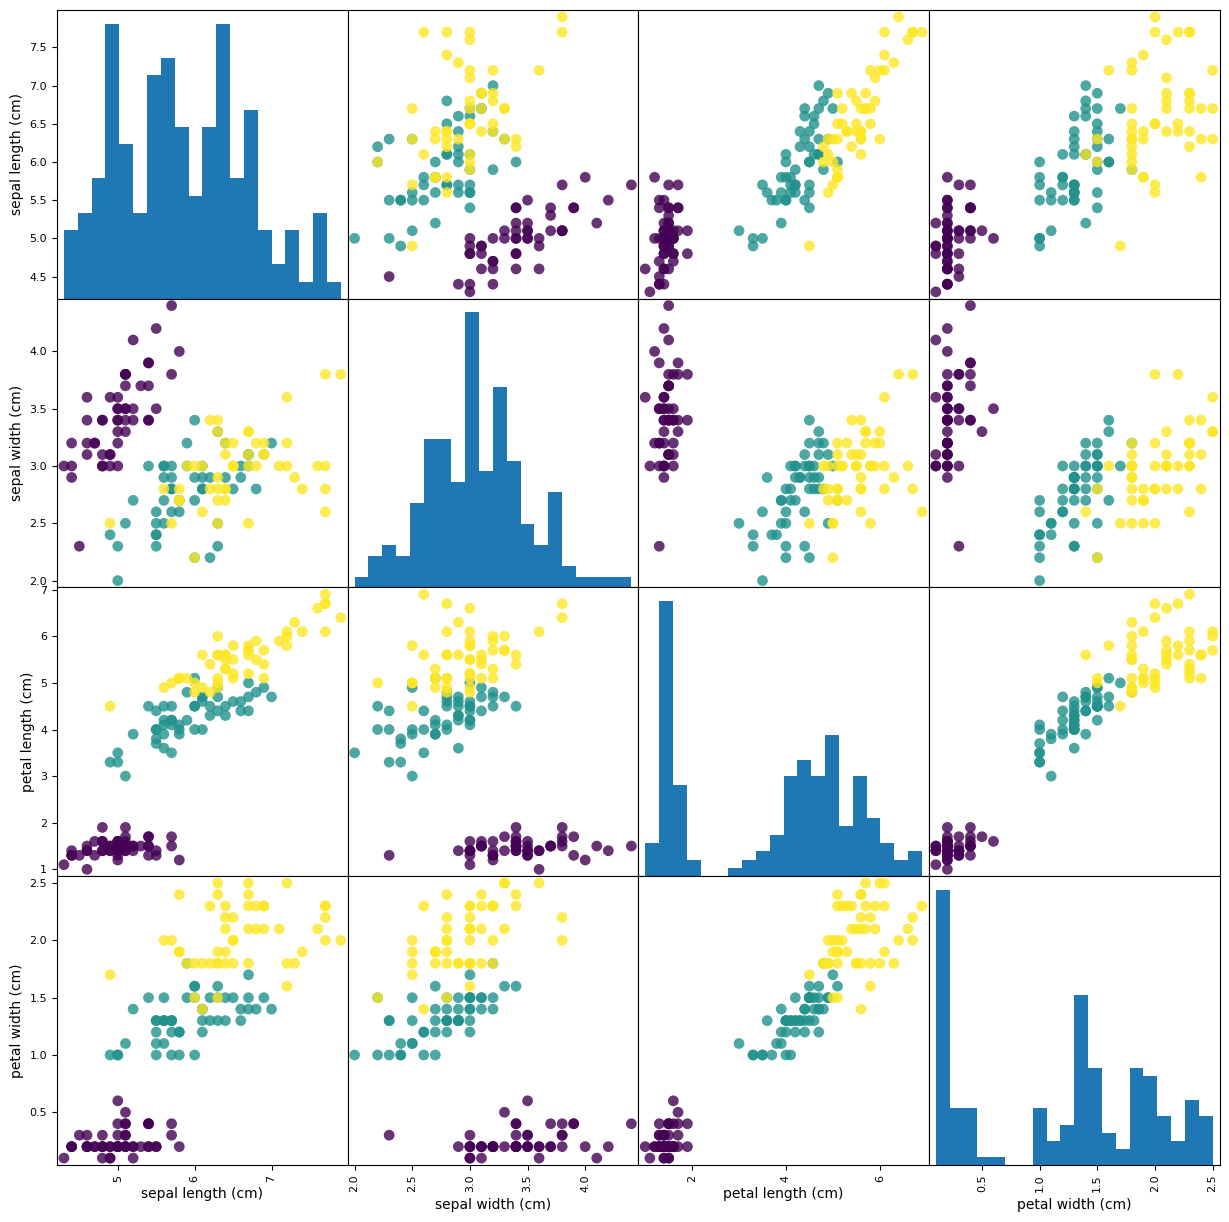

In [15]:
iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

grr = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset.target, figsize=(15, 15), 
                                marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

As we can see, the measurements should be able to distinguish the species.
Now it's time to implement a learning algorithm.

## *k*-nearest-neighbors

Our machine learning algorithm will be the *k*-nearest-neighbor algorithm, which is already implemented in `scikit-learn`.
To evaluate this algorithm, we need to split our dataset into a training and a test set.
Remember, one of the goals of machine learning is an algorithm that performs well on unseen data.
In our case, we use the train dataset to train our algorithm, during this process the algorithm has not access to the test data.
Then we evaluate it by feeding the test data into it and compare it to the actual labels of our test data.
To split our data, we will use the `train_test_split` function from `scikit-learn`.
By default, this splits our data into 75% train and 25% test data.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, 
                                                   iris_dataset.target, random_state=0)

Let's check the shapes.

In [18]:
print(X_train.shape)

(112, 4)


Now it's time to train our model.
In `scikit-learn` machine learning models are implemented in their own [class](https://docs.python.org/3/tutorial/classes.html). The $k$-nearest neighbout algorithm is implemented in the `KNeighborsClassifier` in the `neighbors` module. To use the model, we need to instantiate the class into an object. This is when we will set the parameters of the model. In this case the most important parameter is the number of neighbours, which we will set to 1.

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=1)

Remember from the lecture that training the model simply consists of storing the data.
In this case, we need to tell the algorithm what the data and its labels are.
This is done for the $k$-nearest-neighbour algorithm using the `fit` function.

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Our model is trained and it's time to make a prediction.
To do so, we have the `predict` function.
Let's say we have a found a flower and make the following measurements:

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])

Note that this is a 2-dimensional array since `scikit-learn` expects these for data.

In [23]:
print(X_new.shape)

(1, 4)


Let's make a prediction.

In [26]:
prediction = knn.predict(X_new)

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset.target_names[prediction]))

Prediction: [0]
Predicted target name: ['setosa']


So, with these measurements our algorithm predicts that the species will be *setosa*.
Finally, we can evaluate our model using our test data set.
First, we compute the the predictions of the test data set.

In [29]:
y_pred = knn.predict(X_test)

print(y_pred.shape)

print("Test set predictions \n{}".format(y_pred))

(38,)
Test set predictions 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


So we have 38 prediction of species.
To evaluate, we compare this to the actual labels, for example by computing the mean.

In [30]:
print("Test set score: {}".format(np.mean(y_pred==y_test)))

Test set score: 0.9736842105263158


Alternatively, the implemented $k$-nearest-neighbor algorithm also comes with its own evaluation given by the `score` function.

In [31]:
print("Test set score: {}".format(knn.score(X_test, y_test)))

Test set score: 0.9736842105263158
